# Irish Times Headlines Sentiment Analysis  
This notebook aims to examine Irish Times headlines over the period 1996-2018 using sentiment analysis.

This analysis was done using Valence Aware Dictionary and Sentiment Reasoner (VADER). It is a rule based sentiment analysis tool for python. 

The dataset of Irish Times Headlines is available on kaggle at the following link.
[The Irish Times - Waxy-Wany News](https://www.kaggle.com/therohk/ireland-historical-news).
It contains 1.42 Million headlines.

In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import datetime
import matplotlib.pyplot as plt

### Data Import

In [2]:
data = pd.read_csv("irishtimes-date-text.csv")
data.head()

,publish_date,headline_category,headline_text
0,19960102,news,UUP sees possibility of voting Major out
1,19960102,news,Pubs targeted as curbs on smoking are extended
2,19960102,news,Papers reveal secret links with O'Neill cabinet
3,19960102,news,Domestic chaos as Italy takes EU presidency
4,19960102,news,Learning about the star to which we owe life


In [3]:
data.tail()

,publish_date,headline_category,headline_text
1425455,20181231,sport.other-sports,$9m for 139 seconds: Floyd Mayweather eases pa...
1425456,20181231,news.ireland,Missing pregnant teenager Zoe Hitchcock safe a...
1425457,20181231,news.ireland,Mourners bid farewell to 'beguiling' critic Ei...
1425458,20181231,news.world.us,'Los Angeles Times' making 'progress' in wake ...
1425459,20181231,business.economy,Benign outlook for US-China trade talks lifts ...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425460 entries, 0 to 1425459
Data columns (total 3 columns):
publish_date         1425460 non-null int64
headline_category    1425460 non-null object
headline_text        1425460 non-null object
dtypes: int64(1), object(2)
memory usage: 32.6+ MB


### Data Cleaning 

Converting date from int to datetime format

In [5]:
data["publish_date"] = pd.to_datetime(data["publish_date"].astype(str), format = '%Y%m%d')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425460 entries, 0 to 1425459
Data columns (total 3 columns):
publish_date         1425460 non-null datetime64[ns]
headline_category    1425460 non-null object
headline_text        1425460 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 32.6+ MB


,publish_date,headline_category,headline_text
0,1996-01-02,news,UUP sees possibility of voting Major out
1,1996-01-02,news,Pubs targeted as curbs on smoking are extended
2,1996-01-02,news,Papers reveal secret links with O'Neill cabinet
3,1996-01-02,news,Domestic chaos as Italy takes EU presidency
4,1996-01-02,news,Learning about the star to which we owe life


Converting the headline categories to only contain the main category and ignore the sub categories.

In [6]:
def headline_simplify(x):
  return x.split(".")[0]

data["headline_category"] = data.headline_category.apply(headline_simplify)
data["headline_category"].unique()

array(['news', 'culture', 'opinion', 'business', 'sport', 'lifestyle'],
      dtype=object)

### Sentiment Analysis of "News" Category

In [7]:
df_news = data[data["headline_category"]=="news"].copy()

In [8]:
analyser = SentimentIntensityAnalyzer()
def sent_analysis(sentence):
  return analyser.polarity_scores(sentence)["compound"]

df_news['sentiment'] = df_news['headline_text'].apply(sent_analysis)
df_news.head()

,publish_date,headline_category,headline_text,sentiment
0,1996-01-02,news,UUP sees possibility of voting Major out,0.0000
1,1996-01-02,news,Pubs targeted as curbs on smoking are extended,0.0000
2,1996-01-02,news,Papers reveal secret links with O'Neill cabinet,0.0000
3,1996-01-02,news,Domestic chaos as Italy takes EU presidency,-0.5719
4,1996-01-02,news,Learning about the star to which we owe life,0.0000


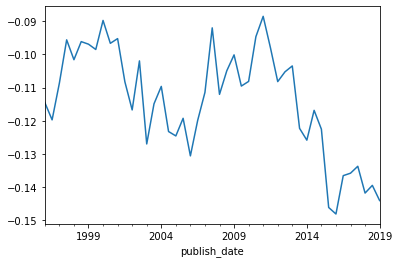

In [9]:
#df_news_2 = df_news[["publish_date","sentiment"]].copy()
#df_news_2.head()
df_by_day = df_news.groupby("publish_date").mean().copy()
df_by_day.head()
df_by_month = df_by_day.resample("6M").mean()
df_by_month.head()
fig, ax = plt.subplots()
df_by_month["sentiment"].plot(ax=ax)

### All Categories

In [10]:
data['sentiment'] = data['headline_text'].apply(sent_analysis)
data.head()

,publish_date,headline_category,headline_text,sentiment
0,1996-01-02,news,UUP sees possibility of voting Major out,0.0000
1,1996-01-02,news,Pubs targeted as curbs on smoking are extended,0.0000
2,1996-01-02,news,Papers reveal secret links with O'Neill cabinet,0.0000
3,1996-01-02,news,Domestic chaos as Italy takes EU presidency,-0.5719
4,1996-01-02,news,Learning about the star to which we owe life,0.0000


In [13]:
data.to_csv("headline_sentiment.csv")

In [30]:
data = pd.read_csv("headline_sentiment.csv", index_col = 0)
data["publish_date"] = pd.to_datetime(data["publish_date"].astype(str), format = '%Y-%m-%d')
data.head()

,publish_date,headline_category,headline_text,sentiment
0,1996-01-02,news,UUP sees possibility of voting Major out,0.0000
1,1996-01-02,news,Pubs targeted as curbs on smoking are extended,0.0000
2,1996-01-02,news,Papers reveal secret links with O'Neill cabinet,0.0000
3,1996-01-02,news,Domestic chaos as Italy takes EU presidency,-0.5719
4,1996-01-02,news,Learning about the star to which we owe life,0.0000


In [31]:
df_by_day = data.groupby(["publish_date", "headline_category"]).mean().reset_index().copy()
df_by_day.head()

,publish_date,headline_category,sentiment
0,1996-01-02,business,0.011019
1,1996-01-02,culture,0.025208
2,1996-01-02,news,-0.130973
3,1996-01-02,opinion,-0.023647
4,1996-01-02,sport,0.085914


In [32]:
df_pivot = df_by_day.pivot(index='publish_date', columns='headline_category', values='sentiment').resample("6M").mean()
df_pivot.head()

headline_category,business,culture,lifestyle,news,opinion,sport
publish_date,,,,,,
1996-01-31,0.052044,-0.012113,0.157601,-0.114507,-0.033051,0.053494
1996-07-31,0.063855,0.015752,0.013008,-0.119715,-0.010538,0.076012
1997-01-31,0.064618,0.040180,0.041277,-0.108653,-0.023138,0.071519
1997-07-31,0.065146,0.024689,0.009768,-0.095632,-0.019629,0.072046
1998-01-31,0.051118,0.035942,0.024196,-0.101611,-0.025843,0.063501


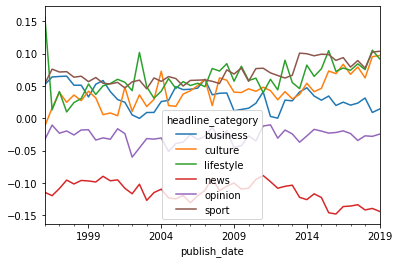

In [33]:
fig, ax = plt.subplots()
df_pivot.plot(ax=ax)